In [2]:
#import kaggle
#import zipfile
#import os
import pandas as pd
import numpy as np

In [6]:
#Get data from Kaggle
#kaggle.api.authenticate()
#kaggle.api.dataset_download_files('bethouyang/taipei-mrt-hourly-traffic-data', unzip=True)

In [7]:
#ensure files are present
#files = os.listdir()
#print(files)

['.ipynb_checkpoints', '201701.parquet.gzip', '201702.parquet.gzip', '201703.parquet.gzip', '201704.parquet.gzip', '201705.parquet.gzip', '201706.parquet.gzip', '201707.parquet.gzip', '201708.parquet.gzip', '201709.parquet.gzip', '201710.parquet.gzip', '201711.parquet.gzip', '201712.parquet.gzip', '201801.parquet.gzip', '201802.parquet.gzip', '201803.parquet.gzip', '201804.parquet.gzip', '201805.parquet.gzip', '201806.parquet.gzip', '201807.parquet.gzip', '201808.parquet.gzip', '201809.parquet.gzip', '201810.parquet.gzip', '201811.parquet.gzip', '201812.parquet.gzip', '201901.parquet.gzip', '201902.parquet.gzip', '201903.parquet.gzip', '201904.parquet.gzip', '201905.parquet.gzip', '201906.parquet.gzip', '201907.parquet.gzip', '201908.parquet.gzip', '201909.parquet.gzip', '201910.parquet.gzip', '201911.parquet.gzip', '201912.parquet.gzip', '202001.parquet.gzip', '202002.parquet.gzip', '202003.parquet.gzip', '202004.parquet.gzip', '202005.parquet.gzip', '202006.parquet.gzip', '202007.par

In [409]:
#len(files)

87

In [3]:
#Read in parquet file as a data frame
df = pd.read_parquet('201701.parquet.gzip')

In [4]:
df.head()

日期  時段    進站    出站  人次
0  2017-01-01   0  松山機場  松山機場   0
1  2017-01-01   0  松山機場  中山國中   0
2  2017-01-01   0  松山機場  南京復興   0
3  2017-01-01   0  松山機場  忠孝復興   0
4  2017-01-01   0  松山機場    大安   0

In [6]:
len(df)

7581600

In [7]:
#The column names are in Chinese but we have a definition from each on Kaggle.  Renaming them into English translation
column_mapping = {
    '日期': 'date',
    '時段': 'hour',
    '進站': 'origin station',
    '出站': 'destination station',
    '人次': 'passenger count'
}


In [8]:
column_mapping

{'日期': 'date',
 '時段': 'hour',
 '進站': 'origin station',
 '出站': 'destination station',
 '人次': 'passenger count'}

In [9]:
df.rename(columns=column_mapping, inplace=True)

In [10]:
df.head()

date  hour origin station destination station  passenger count
0  2017-01-01     0           松山機場                松山機場                0
1  2017-01-01     0           松山機場                中山國中                0
2  2017-01-01     0           松山機場                南京復興                0
3  2017-01-01     0           松山機場                忠孝復興                0
4  2017-01-01     0           松山機場                  大安                0

In [11]:
# Function to add underscore to column names with two words
def add_underscore(column_name):
    if ' ' in column_name:
        return column_name.replace(' ', '_')
    else:
        return column_name

In [12]:
# Apply function to column names using rename
df.rename(columns=add_underscore, inplace=True)

In [13]:
df.head()

date  hour origin_station destination_station  passenger_count
0  2017-01-01     0           松山機場                松山機場                0
1  2017-01-01     0           松山機場                中山國中                0
2  2017-01-01     0           松山機場                南京復興                0
3  2017-01-01     0           松山機場                忠孝復興                0
4  2017-01-01     0           松山機場                  大安                0

In [14]:
#Checking to make sure date is a datetime stamp, it is not
df.dtypes

date                   object
hour                    int64
origin_station         object
destination_station    object
passenger_count         int64
dtype: object

In [15]:
#convert it to a date
df['date'] = pd.to_datetime(df['date'])

In [16]:
#recheck and we are bueno
df.dtypes

date                   datetime64[ns]
hour                            int64
origin_station                 object
destination_station            object
passenger_count                 int64
dtype: object

In [17]:
#The station names are still all in Chinese and I do not have a dictionary for them all.  However, there is a translation pack

#****************************Uncomment the below line one time to install the package needed and then recomment it out**********************
#!pip install googletrans==4.0.0-rc1


In [18]:
from googletrans import Translator

In [19]:
#*********************For some reason you may have to run this block a few times to get it to work, it will work*************************

# Create a translator object
translator = Translator()

# Translate each unique station name from Chinese to English
translated_stations = {}
for station in df['origin_station'].unique():
    translation = translator.translate(station).text
    translated_stations[station] = translation

In [20]:
for key, value in sorted(translated_stations.items(), key=lambda item: item[1]):
    print(f'{key}: {value}')

古亭: Ancient pavilion
輔大: Auxiliary
BL板橋: BL Banqiao
竹圍: Bamboo fence
萬隆: Bandung
景美: Beautiful scenery
北投: Beitou
中正紀念堂: Chiang Kai-shek Memorial Hall
市政府: City Hall
關渡: Customs
大安森林公園: Da'an Forest Park
大安: Daan
大湖公園: Dahu Park
丹鳳: Danfeng
大坪林: Dapinglin
大橋頭站: Daqiao Heeta Station
文德: Deed
頂埔: Dingpu
菜寮: Dish
雙連: Double company
東湖: East Lake
東門: East gate
國父紀念館: Father Memorial Hall
麟光: Glory
葫洲: Gourd
港墘: Hong Kong
後山埤: Houshan 埤
內湖: Inner lake
江子翠: Jiang Zicui
劍南路: Jiannan Road
景安: Jing'an
唭哩岸: Kaishi
昆陽: Konoyo
忠孝復興: Loyal Filial Film Revival
忠義: Loyalty
忠孝敦化: Loyalty and filial piety
蘆洲: Luzhou
公館: Mansion
松山: Matsuyama
明德: Mingde
南港: Nangang
南港展覽館: Nangang Exhibition Hall
南港軟體園區: Nangang Software Park
南京復興: Nanjing Fuxing
南京三民: Nanjing Sanmin
台大醫院: National Taiwan University Hospital
新北投: New Hokkaido throwing
新店: New store
北門: North Gate
先嗇宮: Palace of the Palace
府中: Prefecture
迴龍: Return dragon
復興崗: Revival
圓山: Round mountain
龍山寺: Ryusanji Temple
三和國中: Sanhe Junior High School


In [21]:
# Translate all stations in the DataFrame using the translation dictionary
df['origin_station'] = df['origin_station'].map(lambda x: translated_stations.get(x, x))
df['destination_station'] = df['destination_station'].map(lambda x: translated_stations.get(x, x))

In [22]:
df.head(26)

date  hour    origin_station              destination_station  \
0  2017-01-01     0  Songshan Airport                 Songshan Airport   
1  2017-01-01     0  Songshan Airport          Zhongshan Middle School   
2  2017-01-01     0  Songshan Airport                   Nanjing Fuxing   
3  2017-01-01     0  Songshan Airport        Loyal Filial Film Revival   
4  2017-01-01     0  Songshan Airport                             Daan   
5  2017-01-01     0  Songshan Airport  Science and technology building   
6  2017-01-01     0  Songshan Airport                        Six plows   
7  2017-01-01     0  Songshan Airport                            Glory   
8  2017-01-01     0  Songshan Airport                           Xinhai   
9  2017-01-01     0  Songshan Airport                 Wanfang Hospital   
10 2017-01-01     0  Songshan Airport                Wanfang Community   
11 2017-01-01     0  Songshan Airport                     Wooden craft   
12 2017-01-01     0  Songshan Airport                              zoo   
13 2017-01-01     0  Songshan Airport                         Straight   
14 2017-01-01     0  Songshan Airport                     Jiannan Road   
15 2017-01-01     0  Songshan Airport                        West Lake   
16 2017-01-01     0  Songshan Airport                        Hong Kong   
17 2017-01-01     0  Songshan Airport                             Deed   
18 2017-01-01     0  Songshan Airport                       Inner lake   
19 2017-01-01     0  Songshan Airport                        Dahu Park   
20 2017-01-01     0  Songshan Airport                            Gourd   
21 2017-01-01     0  Songshan Airport                        East Lake   
22 2017-01-01     0  Songshan Airport            Nangang Software Park   
23 2017-01-01     0  Songshan Airport          Nangang Exhibition Hall   
24 2017-01-01     0  Songshan Airport                        Xiaobitan   
25 2017-01-01     0  Songshan Airport                        New store   

    passenger_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 1  
6                 0  
7                 1  
8                 0  
9                 2  
10                1  
11                0  
12                2  
13                1  
14                0  
15                2  
16                0  
17                1  
18                4  
19                1  
20                0  
21                2  
22                0  
23                0  
24                0  
25                0

In [23]:
# I want to know how many unique stations are in the orgin and destination columns
num_unique_origin = df['origin_station'].nunique()
num_unique_destination = df['destination_station'].nunique()
print("Number of unique origin stations:", num_unique_origin)
print("Number of unique destination stations:", num_unique_destination)


Number of unique origin stations: 108
Number of unique destination stations: 108


In [24]:
import matplotlib.pyplot as plt

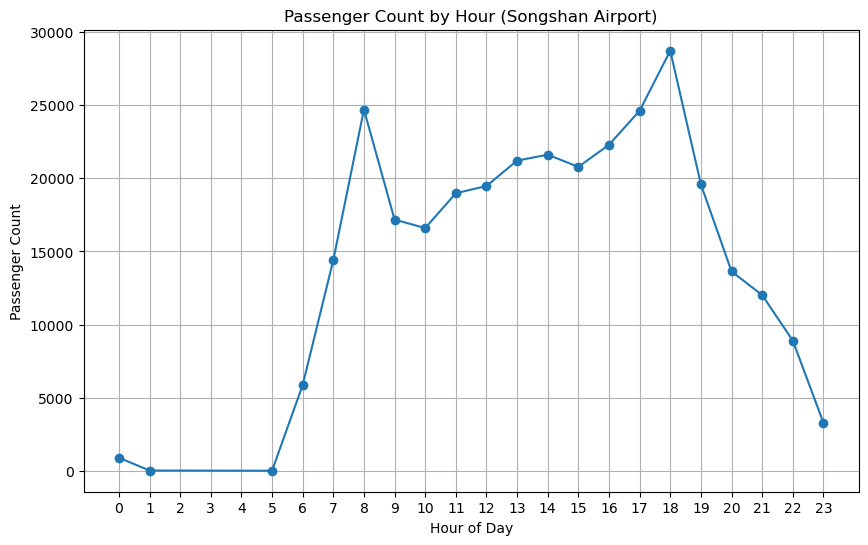

In [25]:
#I want to see what the airports passenger count data by hour is 
songshan_airport_data = df[(df['origin_station'] == 'Songshan Airport') | (df['destination_station'] == 'Songshan Airport')]

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count_all = songshan_airport_data.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count_all.index, hourly_passenger_count_all.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour (Songshan Airport)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

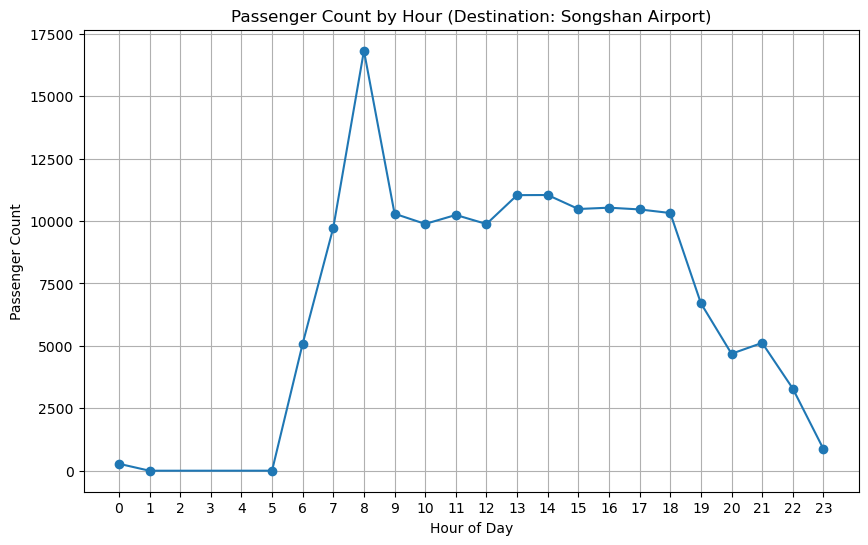

In [26]:
#I want to plot the passanger count by hour of data that has Songshan Airport as the destination
songshan_destination_data = df[df['destination_station'] == 'Songshan Airport']

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count = songshan_destination_data.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour (Destination: Songshan Airport)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

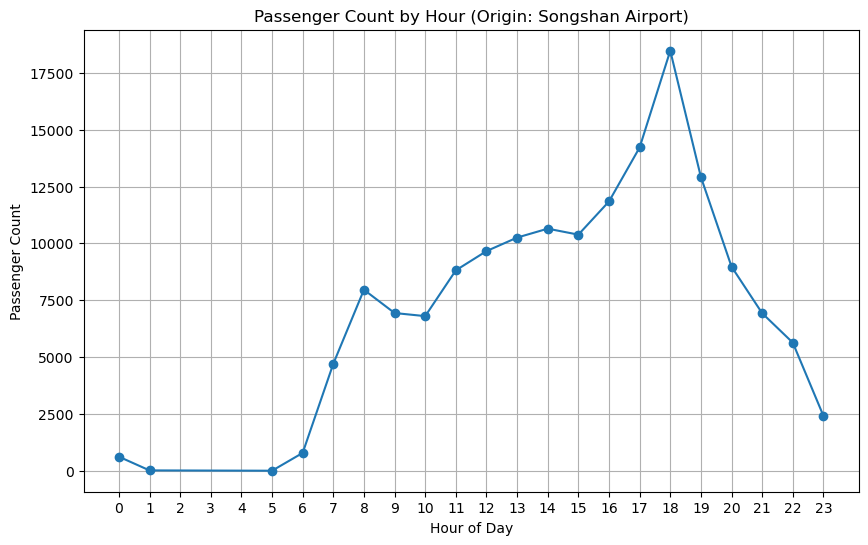

In [27]:
#Same but Songshan Airport is the orgin
songshan_origin_data = df[df['origin_station'] == 'Songshan Airport']

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count = songshan_origin_data.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour (Origin: Songshan Airport)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

In [28]:
# This is interesting but I wonder if weekends being in here is changeing the data
df['date'].unique()


<DatetimeArray>
['2017-01-01 00:00:00', '2017-01-02 00:00:00', '2017-01-03 00:00:00',
 '2017-01-04 00:00:00', '2017-01-05 00:00:00', '2017-01-06 00:00:00',
 '2017-01-07 00:00:00', '2017-01-08 00:00:00', '2017-01-09 00:00:00',
 '2017-01-10 00:00:00', '2017-01-11 00:00:00', '2017-01-12 00:00:00',
 '2017-01-13 00:00:00', '2017-01-14 00:00:00', '2017-01-15 00:00:00',
 '2017-01-16 00:00:00', '2017-01-17 00:00:00', '2017-01-18 00:00:00',
 '2017-01-19 00:00:00', '2017-01-20 00:00:00', '2017-01-21 00:00:00',
 '2017-01-22 00:00:00', '2017-01-23 00:00:00', '2017-01-24 00:00:00',
 '2017-01-25 00:00:00', '2017-01-26 00:00:00', '2017-01-27 00:00:00',
 '2017-01-28 00:00:00', '2017-01-29 00:00:00', '2017-01-30 00:00:00',
 '2017-01-31 00:00:00']
Length: 31, dtype: datetime64[ns]

In [29]:
#take out weekends
df['day_of_week'] = df['date'].dt.dayofweek
df_weekdays = df[(df['day_of_week'] != 5) & (df['day_of_week'] != 6)]
df_weekdays.drop(columns=['day_of_week'], inplace=True)

C:\Users\CrespoAnthony\AppData\Local\Temp\ipykernel_35180\4168539621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekdays.drop(columns=['day_of_week'], inplace=True)


In [30]:
df_weekdays.head()

date  hour    origin_station        destination_station  \
233280 2017-01-02     0  Songshan Airport           Songshan Airport   
233281 2017-01-02     0  Songshan Airport    Zhongshan Middle School   
233282 2017-01-02     0  Songshan Airport             Nanjing Fuxing   
233283 2017-01-02     0  Songshan Airport  Loyal Filial Film Revival   
233284 2017-01-02     0  Songshan Airport                       Daan   

        passenger_count  
233280                1  
233281                0  
233282                0  
233283                0  
233284                0

In [31]:
songshan_airport_data_weekdays = df_weekdays[(df_weekdays['origin_station'] == 'Songshan Airport') | (df_weekdays['destination_station'] == 'Songshan Airport')]

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count_weekdays = songshan_airport_data_weekdays.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour for weekdays
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count_weekdays.index, hourly_passenger_count_weekdays.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour (Origin or Destination: Songshan Airport) - Weekdays Only')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

In [32]:
#Only weekends
df_weekends = df[(df['day_of_week'] == 5) | (df['day_of_week'] == 6)]
df_weekends.drop(columns=['day_of_week'], inplace=True)

C:\Users\CrespoAnthony\AppData\Local\Temp\ipykernel_35180\3646276953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekends.drop(columns=['day_of_week'], inplace=True)


In [33]:
df_weekends.head()

date  hour    origin_station        destination_station  \
0 2017-01-01     0  Songshan Airport           Songshan Airport   
1 2017-01-01     0  Songshan Airport    Zhongshan Middle School   
2 2017-01-01     0  Songshan Airport             Nanjing Fuxing   
3 2017-01-01     0  Songshan Airport  Loyal Filial Film Revival   
4 2017-01-01     0  Songshan Airport                       Daan   

   passenger_count  
0                0  
1                0  
2                0  
3                0  
4                0

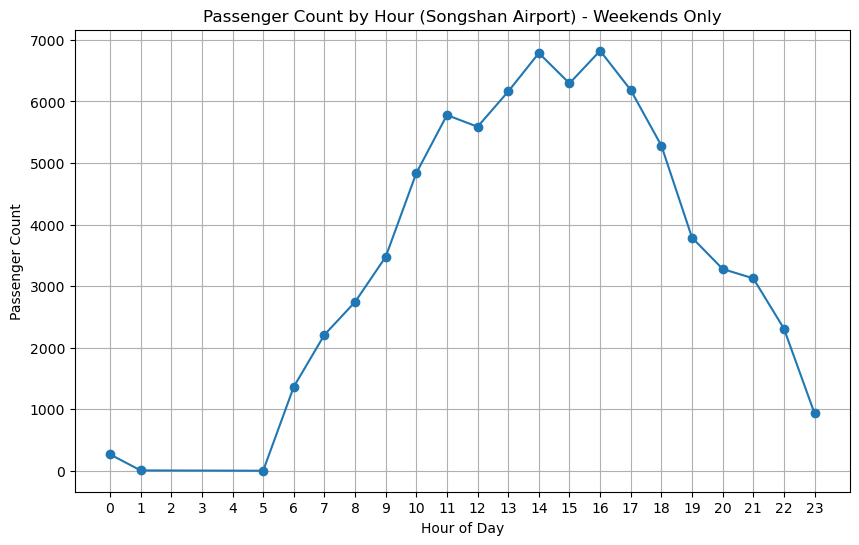

In [34]:
# Filter the df_weekends DataFrame for rows where either the origin station or the destination station is Songshan Airport
songshan_airport_data_weekends = df_weekends[(df_weekends['origin_station'] == 'Songshan Airport') | (df_weekends['destination_station'] == 'Songshan Airport')]

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count_weekends = songshan_airport_data_weekends.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour for weekends at Songshan Airport
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count_weekends.index, hourly_passenger_count_weekends.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour (Songshan Airport) - Weekends Only')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

In [35]:
#weekends Songshan Airport is the orgin
songshan_origin_data = df_weekends[df_weekends['origin_station'] == 'Songshan Airport']

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count = songshan_origin_data.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour Weekend (Origin: Songshan Airport)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

In [36]:
#weekends Songshan Airport is the desitination
songshan_destination_data = df_weekends[df_weekends['destination_station'] == 'Songshan Airport']

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count = songshan_destination_data.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour Weekend (Destination: Songshan Airport)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

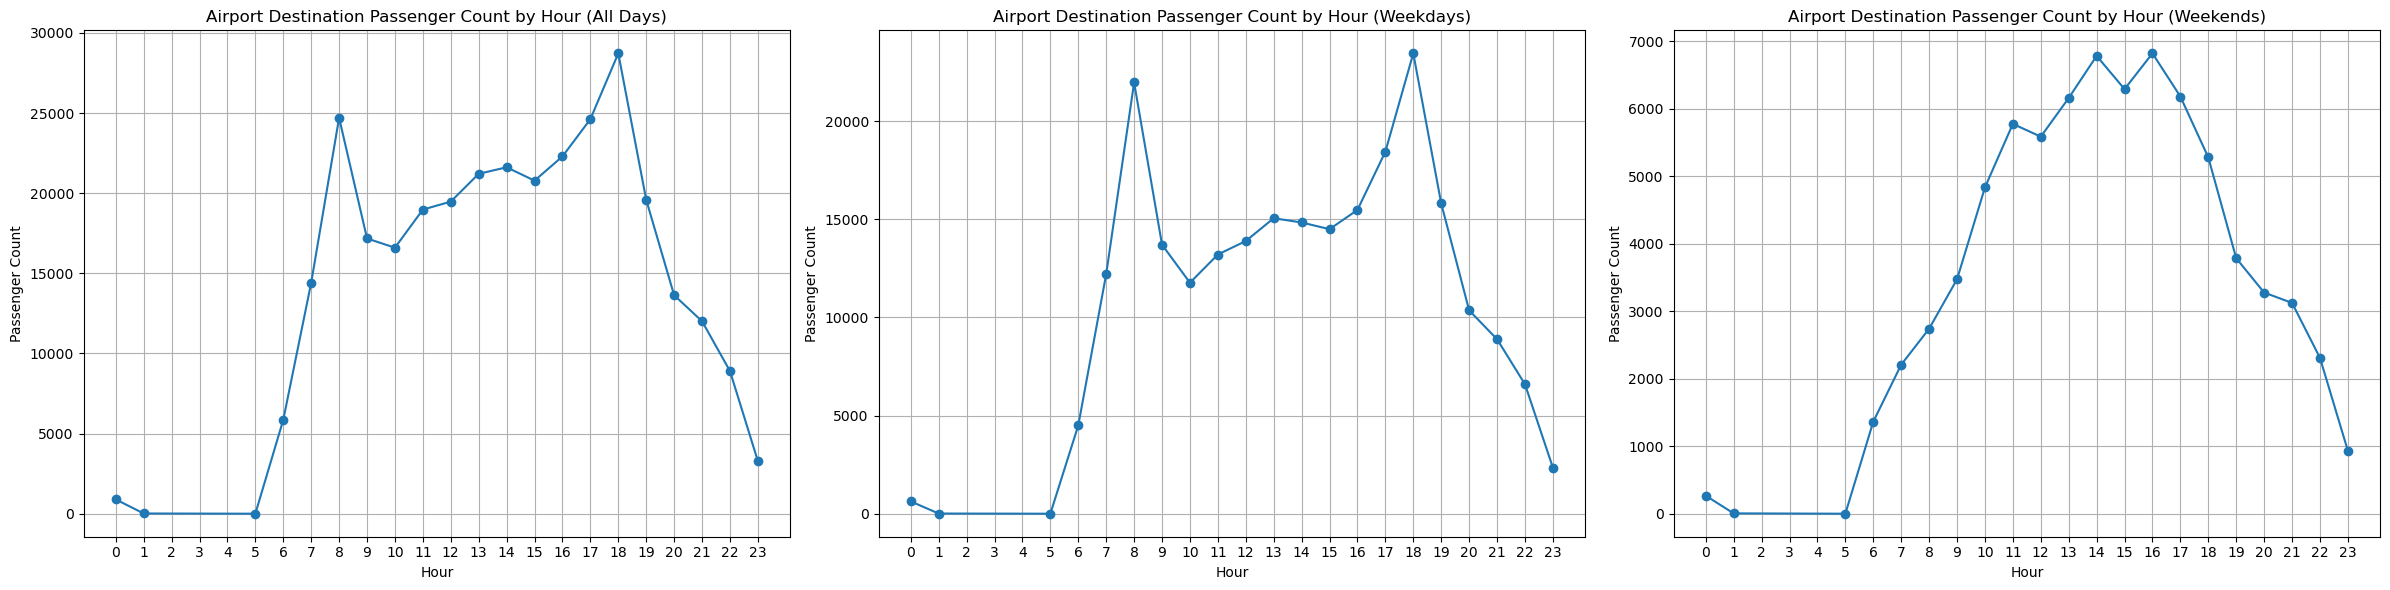

In [37]:
# Plot all airport data side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot for all days
axs[0].plot(hourly_passenger_count_all.index, hourly_passenger_count_all.values, marker='o', linestyle='-')
axs[0].set_title('Airport Destination Passenger Count by Hour (All Days)')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Passenger Count')
axs[0].grid(True)
axs[0].set_xticks(range(0, 24))  # Ensure all hours are shown on x-axis

# Plot for weekdays
axs[1].plot(hourly_passenger_count_weekdays.index, hourly_passenger_count_weekdays.values, marker='o', linestyle='-')
axs[1].set_title('Airport Destination Passenger Count by Hour (Weekdays)')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Passenger Count')
axs[1].grid(True)
axs[1].set_xticks(range(0, 24))  # Ensure all hours are shown on x-axis

# Plot for weekends
axs[2].plot(hourly_passenger_count_weekends.index, hourly_passenger_count_weekends.values, marker='o', linestyle='-')
axs[2].set_title('Airport Destination Passenger Count by Hour (Weekends)')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('Passenger Count')
axs[2].grid(True)
axs[2].set_xticks(range(0, 24))  # Ensure all hours are shown on x-axis

plt.tight_layout()
plt.show()

In [38]:
#I want to recreate the graphic from the article but Taipei City Hall and Zhongxiao Fuxing are not in this one month of data
#I replaced them with two stops that ChatGPT recommended that are very similair 
selected_stations = ['Xinpu', 'Yongan Market', 'Zhongxiao Xinsheng', 'Taipei 101/World Trade']
article_stations = df_weekdays[df_weekdays['origin_station'].isin(selected_stations)]




In [39]:
article_stations.head()

date  hour origin_station        destination_station  \
237276 2017-01-02     0  Yongan Market           Songshan Airport   
237277 2017-01-02     0  Yongan Market    Zhongshan Middle School   
237278 2017-01-02     0  Yongan Market             Nanjing Fuxing   
237279 2017-01-02     0  Yongan Market  Loyal Filial Film Revival   
237280 2017-01-02     0  Yongan Market                       Daan   

        passenger_count  
237276                0  
237277                0  
237278                0  
237279                2  
237280                2

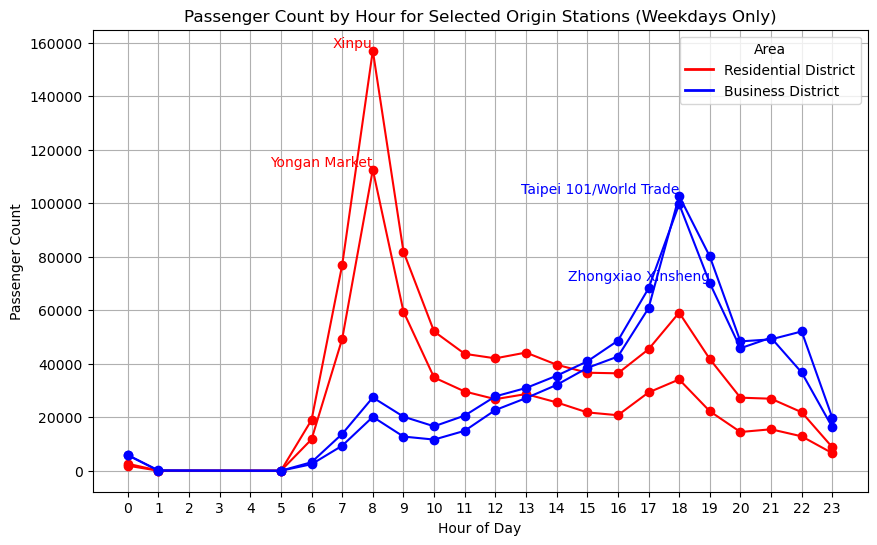

In [40]:
# Define the stations and their corresponding colors
station_colors = {'Xinpu': 'red', 'Yongan Market': 'red', 'Zhongxiao Xinsheng': 'blue', 'Taipei 101/World Trade': 'blue'}

plt.figure(figsize=(10, 6))
for station in selected_stations:
    station_data = article_stations[(article_stations['origin_station'] == station)]
    hourly_passenger_count = station_data.groupby('hour')['passenger_count'].sum()
    max_count_index = hourly_passenger_count.idxmax()  # Index of maximum passenger count for City name placement
    max_count_value = hourly_passenger_count[max_count_index]  # Maximum passenger count value
    if station == 'Zhongxiao Xinsheng':
        second_max_count_index = hourly_passenger_count.drop(max_count_index).idxmax()  # Index of second maximum passenger count for City name placement
        second_max_count_value = hourly_passenger_count[second_max_count_index]  # Second maximum passenger count value
        plt.text(second_max_count_index, second_max_count_value, station, color=station_colors[station], fontsize=10, ha='right', va='bottom')
    else:
        plt.text(max_count_index, max_count_value, station, color=station_colors[station], fontsize=10, ha='right', va='bottom')
    plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker='o', linestyle='-', color=station_colors[station], label=station)

# Add legend with customized labels
legend_handles = [plt.Line2D([0], [0], color=color, linewidth=2) for color in ['red', 'blue']]
legend_labels = ['Residential District', 'Business District']
plt.legend(legend_handles, legend_labels, title='Area')

# Set plot title, labels, and grid
plt.title('Passenger Count by Hour for Selected Origin Stations (Weekdays Only)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(24))

plt.show()


In [41]:
# I want to continue the PCA Analysis from the article and to do so I need to reorg the data


# Group the DataFrame by station and hour, summing the passenger count for each group
passengers_per_hour_per_station = df_weekdays.groupby(['origin_station', 'hour'])['passenger_count'].sum()

# Calculate the total number of passengers for each station across all hours
total_passengers_per_station = passengers_per_hour_per_station.groupby('origin_station').sum()

# Divide the passenger count for each station per hour by the total passengers for that station
proportion_passengers_per_hour_per_station = passengers_per_hour_per_station / total_passengers_per_station

# Reset index to make station and hour columns accessible
proportion_passengers_per_hour_per_station = proportion_passengers_per_hour_per_station.reset_index()

# Pivot the DataFrame to have stations as index and hours as columns
proportion_passengers_per_hour_per_station = proportion_passengers_per_hour_per_station.pivot(index='origin_station', columns='hour', values='passenger_count')

X = proportion_passengers_per_hour_per_station



In [42]:
X.head()

hour                    0         1         5         6         7         8   \
origin_station                                                                 
Ancient pavilion  0.006512  0.000212  0.000009  0.009851  0.041214  0.080796   
Auxiliary         0.005498  0.000034  0.000005  0.015395  0.053148  0.106994   
BL Banqiao        0.005721  0.000058  0.000004  0.011762  0.054776  0.129889   
Bamboo fence      0.004081  0.000186  0.000015  0.027062  0.097359  0.143512   
Bandung           0.003777  0.000157  0.000024  0.020604  0.094639  0.181186   

hour                    9         10        11        12  ...        14  \
origin_station                                            ...             
Ancient pavilion  0.052130  0.037676  0.039730  0.045460  ...  0.047267   
Auxiliary         0.059067  0.037850  0.038673  0.046997  ...  0.047244   
BL Banqiao        0.070497  0.050166  0.046317  0.048568  ...  0.050584   
Bamboo fence      0.080008  0.061234  0.056700  0.057390  ...  0.051583   
Bandung           0.094135  0.058021  0.053460  0.047383  ...  0.046840   

hour                    15        16        17        18        19        20  \
origin_station                                                                 
Ancient pavilion  0.047402  0.051302  0.086245  0.124727  0.083981  0.056832   
Auxiliary         0.052224  0.067411  0.091217  0.106607  0.056594  0.042100   
BL Banqiao        0.047625  0.049396  0.068640  0.089589  0.066533  0.046172   
Bamboo fence      0.046737  0.050712  0.067660  0.068641  0.042671  0.031752   
Bandung           0.040611  0.040284  0.055085  0.073492  0.047789  0.029955   

hour                    21        22        23  
origin_station                                  
Ancient pavilion  0.059280  0.061620  0.020053  
Auxiliary         0.046881  0.053671  0.021067  
BL Banqiao        0.046765  0.043907  0.020675  
Bamboo fence      0.028949  0.019147  0.009888  
Bandung           0.028330  0.022972  0.010618  

[5 rows x 21 columns]

In [43]:
#PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 3

X_tran = StandardScaler().fit_transform(X)

pca = PCA(n_components=n_components, whiten=True, random_state=0)
pca.fit(X_tran)

PCA(n_components=3, random_state=0, whiten=True)

In [44]:
pd.set_option('display.precision', 2)

W = pca.components_
W_df = pd.DataFrame(W, index=[f'PC_{i}' for i in range(1, n_components+1)])
W_df.round(2).style.background_gradient(cmap='Blues')

In [45]:
Z = pca.fit_transform(X)

# Name the PCs according to the insights on W matrix
Z_df = pd.DataFrame(Z, index=X.index, columns=['Morning', 'Noon', 'Night'])



In [46]:
Z_df.head()

Morning      Noon  Night
origin_station                            
Ancient pavilion    -0.63  1.55e-03   0.42
Auxiliary           -0.18 -8.49e-01   0.21
BL Banqiao           0.14 -1.34e-01   0.61
Bamboo fence         0.74 -7.37e-01  -0.06
Bandung              1.01  2.26e-01   0.08

In [47]:
#Ensure this is accurate
#weekends Songshan Airport is the orgin
ancient_pavilion_data = df_weekdays[df_weekdays['origin_station'] == 'Ancient pavilion']

# Group the filtered data by hour and sum the passenger count for each hour
hourly_passenger_count = ancient_pavilion_data.groupby('hour')['passenger_count'].sum()

# Plot the passenger count by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_passenger_count.index, hourly_passenger_count.values, marker='o', linestyle='-')
plt.title('Passenger Count by Hour Weekend (Origin: Ancient Pavilion)')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

In [48]:
# Look at the stations we demonstrated earlier
Z_df = Z_df.loc[['Zhongxiao Xinsheng', 'Taipei 101/World Trade', 'Xinpu', 'Yongan Market'], :]
Z_df.style.background_gradient(cmap='Blues', axis=1)

In [49]:
from sklearn.cluster import KMeans

# Fit Z matrix to K-Means model 
kmeans = KMeans(n_clusters=3)
kmeans.fit(Z)

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
#create df from kmeans model

cluster_df = pd.DataFrame(Z, columns=['PC1', 'PC2', 'PC3'])
cluster_df.index = X.index
cluster_df['series'] = kmeans.labels_
cluster_df['label'] = cluster_df['series'].map({0: 'Morning', 1: 'Night', 2: 'Noon'})

In [51]:
cluster_df.head(10)

PC1       PC2   PC3  series    label
origin_station                                                      
Ancient pavilion              -0.63  1.55e-03  0.42       0  Morning
Auxiliary                     -0.18 -8.49e-01  0.21       0  Morning
BL Banqiao                     0.14 -1.34e-01  0.61       0  Morning
Bamboo fence                   0.74 -7.37e-01 -0.06       2     Noon
Bandung                        1.01  2.26e-01  0.08       2     Noon
Beautiful scenery              0.29 -4.37e-01  0.16       0  Morning
Beitou                         0.61 -4.80e-01 -0.29       2     Noon
Chiang Kai-shek Memorial Hall -0.94 -1.93e+00 -1.52       0  Morning
City Hall                     -1.47  1.32e-01  1.32       0  Morning
Customs                       -0.34 -7.83e-01 -0.87       0  Morning

In [52]:
import plotly.express as px

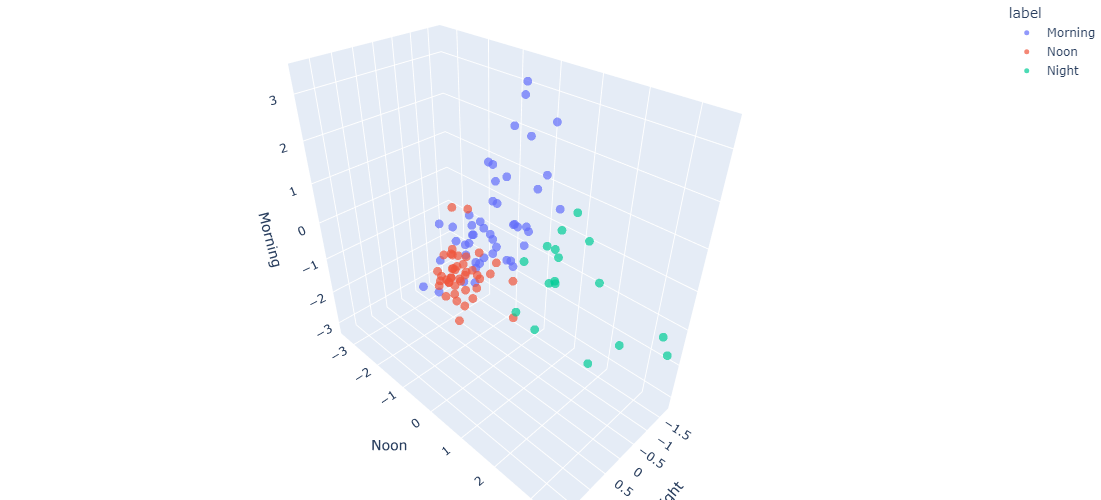

In [53]:
# Create the 3D scatter plot
fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', 
                     color='label', 
                     hover_data={"Station": cluster_df.index},  
                     labels={"PC1": "Night", "PC2": "Noon", "PC3": "Morning"},
                     opacity=0.7,
                     size_max=1,
                     width=800, height=500
                  ).update_layout(margin=dict(l=0, r=0, b=0, t=0)
                  ).update_traces(marker_size=5)

# Show the plot
fig.show()


In [54]:
#Due to the varied nature of "noon" data, is 3 the correct amount of clusters


#****************************Uncomment the below line one time to install the package needed and then recomment it out**********************
#!pip install yellowbrick



from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

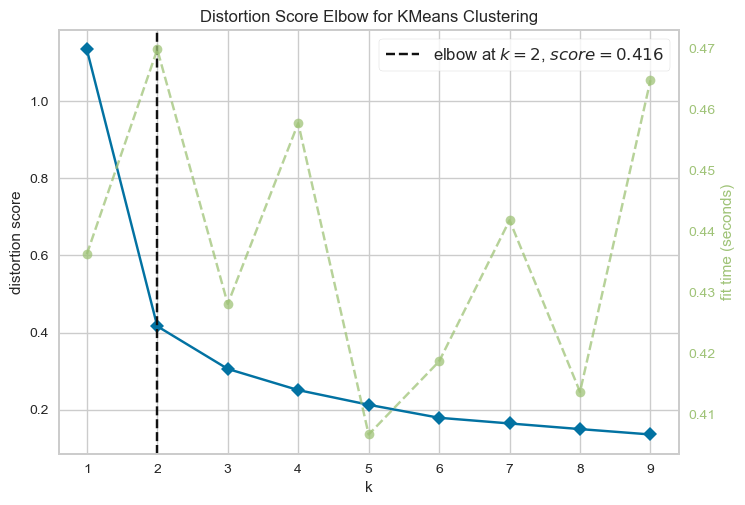

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)   
visualizer.show()

In [56]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=True
)

visualizer.fit(X)       
visualizer.show() 

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\CrespoAnthony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>